In [25]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import re

# Import LogoMaker
import sys
sys.path.append('/Users/jkinney/github/')
import logomaker

%matplotlib inline
plt.ion()

In [56]:
#logomaker.get_fontnames()
mat_df = pd.read_csv('DBF.logo.txt',delim_whitespace=True, index_col=0)
mat_df.reset_index(inplace=True, drop=True)
mat_df.head()

# Floor out low values
mat_df[abs(mat_df) < .02] = 0

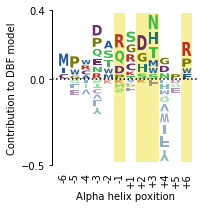

In [58]:
colors = {'DEC': [.42, .16, .42],
           'PG': [.47, .47, 0.0],
      'MIWALFV': [.13, .35, .61],
         'NTSQ': [.25, .73, .28],
           'RK': [.74, .18, .12],
           'HY': [.09, .47, .46]}

highlight_color = [.96, .94, .60]

fig, ax = plt.subplots(figsize=[3,3])

logo = logomaker.Logo(mat_df, 
                     ax=ax, 
                     colors=colors,
                     vpad=.2,
                     width=.8)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'],visible=True)
logo.style_glyphs_below(fade=.5)
ax.axhline(0,linestyle=':',color='k')

logo.highlight_position(5, color=highlight_color)
logo.highlight_position(7, color=highlight_color)
logo.highlight_position(8, color=highlight_color)
logo.highlight_position(11, color=highlight_color)


# Style axes
ylim = [-.5,+.4]
ax.set_ylim(ylim)
xticks = range(len(mat_df))
xticklabels = ['%+d'%x for x in  list(range(-6,0))+list(range(1,7))]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)
ax.set_yticks([ylim[0], 0, ylim[1]])
ax.set_xlim([-1,len(mat_df)])
ax.xaxis.set_tick_params(width=0)

ax.set_xlabel('Alpha helix poxition')
ax.set_ylabel('Contribution to DBF model')

fig.tight_layout()
fig.savefig('Example_Najafabadi.pdf')